1. Loading and Preprocessing

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('CarPrice_Assignment.csv')

# Display the first few rows of the dataframe
print(df.head())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

2. Model Implementation


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


In [3]:
# Preprocessing
# Convert categorical variables to dummy variables
df = pd.get_dummies(df, drop_first=True)


In [4]:
# Define the independent variables (features) and the dependent variable (target)
X = df.drop(['car_ID', 'price'], axis=1)
y = df['price']


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
# Initialize the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}


In [7]:
# Train the models and evaluate their performance
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[model_name] = {
        "R-squared": r2_score(y_test, y_pred),
        "Mean Squared Error": mean_squared_error(y_test, y_pred),
        "Mean Absolute Error": mean_absolute_error(y_test, y_pred)
    }


3. Model Evaluation


In [8]:
# Print the results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    for metric_name, metric_value in metrics.items():
        print(f"  {metric_name}: {metric_value}")


Linear Regression:
  R-squared: 0.47371533157502776
  Mean Squared Error: 41547027.85278472
  Mean Absolute Error: 4177.29563135186
Decision Tree Regressor:
  R-squared: 0.855897691975291
  Mean Squared Error: 11376015.613509487
  Mean Absolute Error: 2200.1422682926827
Random Forest Regressor:
  R-squared: 0.9534566623613863
  Mean Squared Error: 3674318.218351683
  Mean Absolute Error: 1365.3525121951218
Gradient Boosting Regressor:
  R-squared: 0.9305972928856937
  Mean Squared Error: 5478928.75953656
  Mean Absolute Error: 1700.9865846172768
Support Vector Regressor:
  R-squared: -0.10198862586170465
  Mean Squared Error: 86995413.0891717
  Mean Absolute Error: 5707.166800883862


4. Feature Importance Analysis


In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
df = pd.read_csv('CarPrice_Assignment.csv')

# Preprocessing
df = pd.get_dummies(df, drop_first=True)

# Define the independent variables (features) and the dependent variable (target)
X = df.drop(['car_ID', 'price'], axis=1)
y = df['price']

# Train a Random Forest Regressor to get feature importances
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importances.head(10))

             Feature  Importance
6         enginesize    0.650279
5         curbweight    0.192465
13        highwaympg    0.057622
10        horsepower    0.018789
3           carwidth    0.012220
2          carlength    0.007090
9   compressionratio    0.006411
12           citympg    0.006356
1          wheelbase    0.005860
11           peakrpm    0.005179


Visualize feature importance

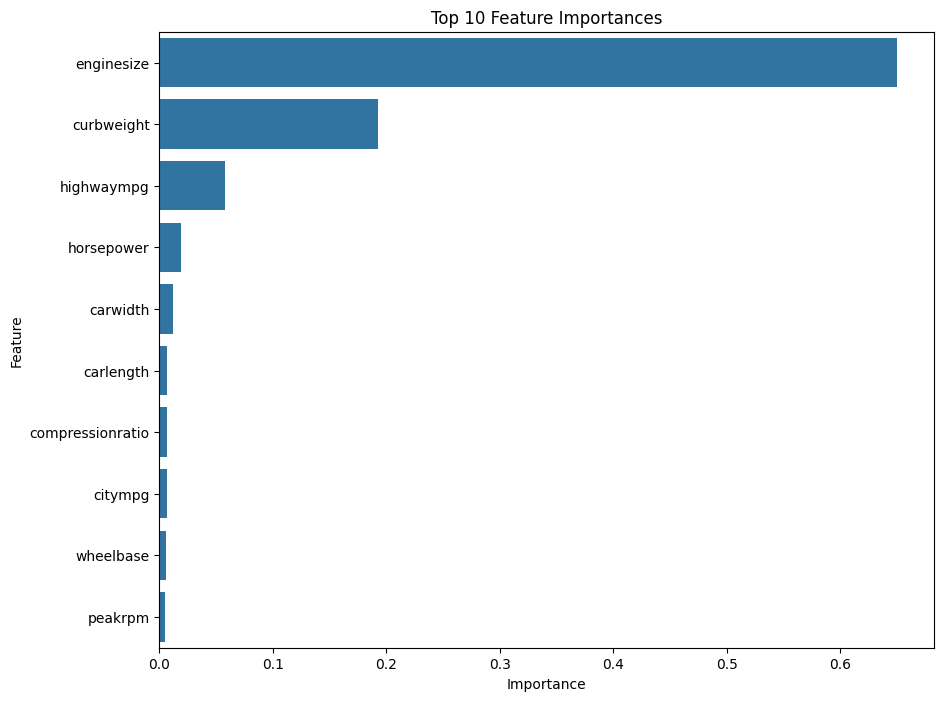

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor

# Load the dataset
df = pd.read_csv('CarPrice_Assignment.csv')

# Preprocessing
df = pd.get_dummies(df, drop_first=True)

# Define the independent variables (features) and the dependent variable (target)
X = df.drop(['car_ID', 'price'], axis=1)
y = df['price']

# Train a Random Forest Regressor to get feature importances
model = RandomForestRegressor(random_state=42)
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances.head(10))
plt.title('Top 10 Feature Importances')
plt.show()

5. Hyperparameter Tuning


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load the dataset
df = pd.read_csv('CarPrice_Assignment.csv')

# Preprocess the data
df['CarName'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df = pd.get_dummies(df, drop_first=True)

# Split the data into features and target variable
X = df.drop(['car_ID', 'price'], axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model and its hyperparameters for tuning
model = RandomForestRegressor(random_state=42)
params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(model, params, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
results = {
    'R-squared': r2_score(y_test, y_pred),
    'MSE': mean_squared_error(y_test, y_pred),
    'MAE': mean_absolute_error(y_test, y_pred)
}

# Print the results
print("Best Model (Random Forest Regressor) after Hyperparameter Tuning:")
for metric_name, value in results.items():
    print(f"  {metric_name}: {value}")

Best Model (Random Forest Regressor) after Hyperparameter Tuning:
  R-squared: 0.9577733158858429
  MSE: 3333544.232386725
  MAE: 1287.900052845528
